In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True, errors='ignore')
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [12]:
display(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
display(df.columns.tolist())

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

In [14]:
display(df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64

In [26]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: Name
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64

Column: Sex
Sex
male      577
female    314
Name: count, dtype: int64

Column: Ticket
Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
392091     

C:\Users\DIYA\AppData\Local\Temp\ipykernel_19328\4284431607.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


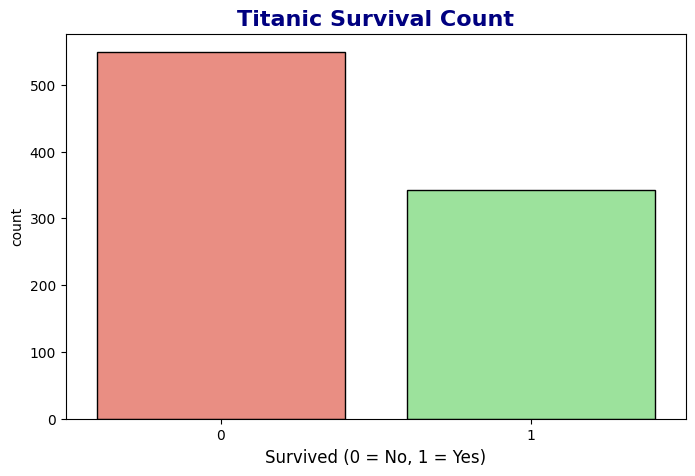

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(
    x='Survived',
    data=df,
    palette={'0': 'salmon', '1': 'lightgreen'},
    edgecolor='black'
)

plt.title('Titanic Survival Count', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.show()

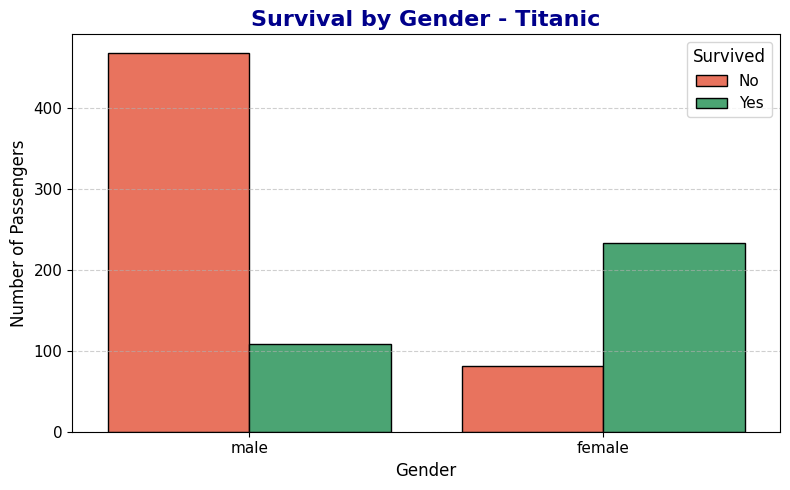

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(
    x='Sex',
    hue='Survived',
    data=df,
    palette={0: 'tomato', 1: 'mediumseagreen'},
    edgecolor='black'
)

plt.title('Survival by Gender - Titanic', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Survived', labels=['No', 'Yes'], title_fontsize=12, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


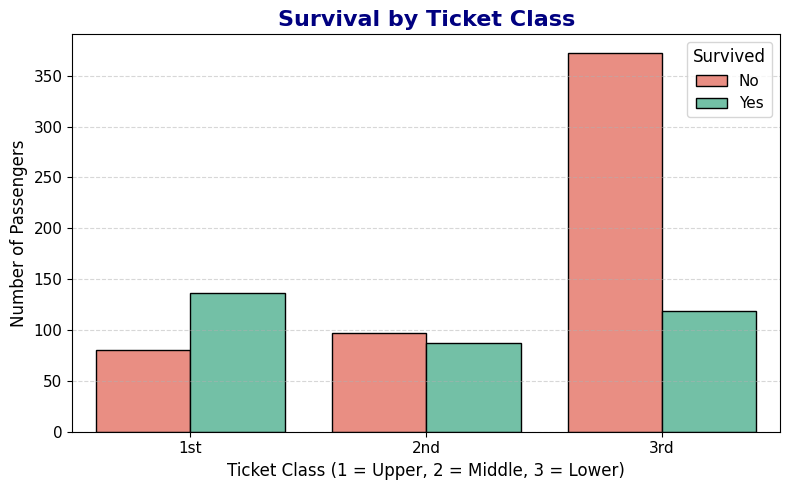

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(
    x='Pclass',
    hue='Survived',
    data=df,
    palette={0: 'salmon', 1: 'mediumaquamarine'},
    edgecolor='black'
)

plt.title('Survival by Ticket Class', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Ticket Class (1 = Upper, 2 = Middle, 3 = Lower)', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks([0, 1, 2], ['1st', '2nd', '3rd'], fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Survived', labels=['No', 'Yes'], title_fontsize=12, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


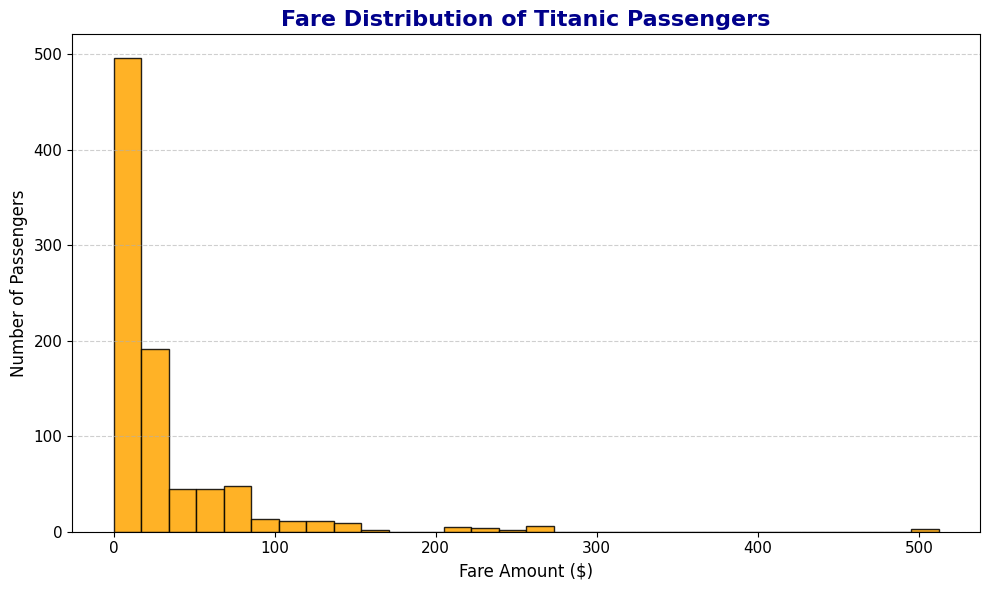

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=30, color='#FFA500', edgecolor='black', alpha=0.85)
plt.title('Fare Distribution of Titanic Passengers', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Fare Amount ($)', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


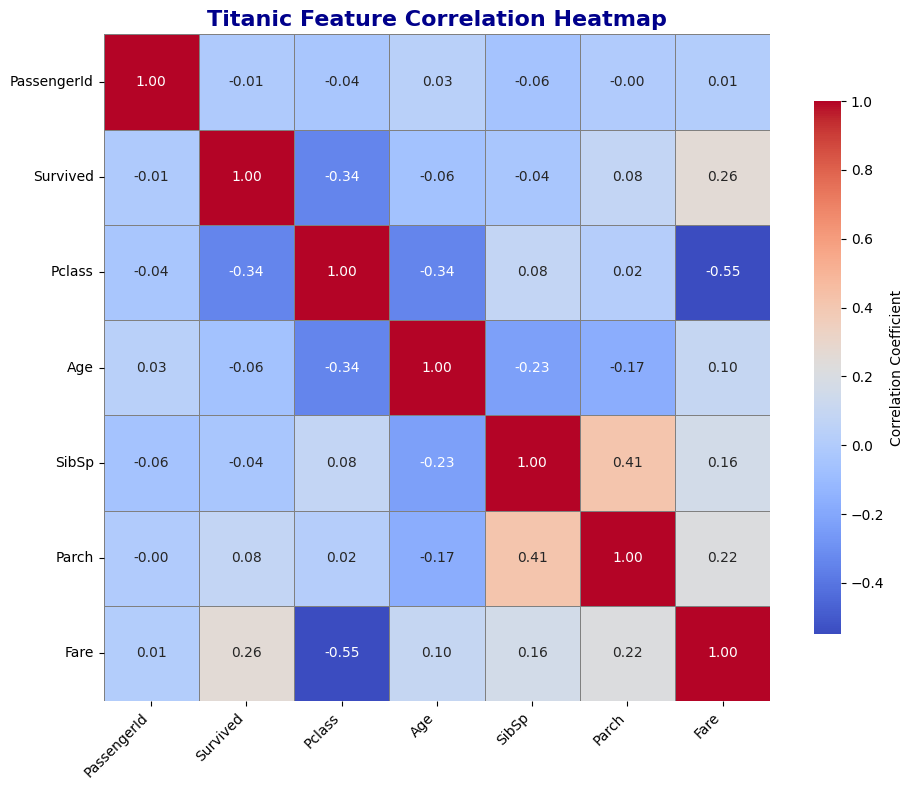

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            linewidths=0.5, 
            linecolor='gray', 
            square=True, 
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'})

plt.title('Titanic Feature Correlation Heatmap', fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\DIYA\AppData\Local\Temp\ipykernel_19328\166503234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2', width=0.6, linewidth=2, fliersize=4)


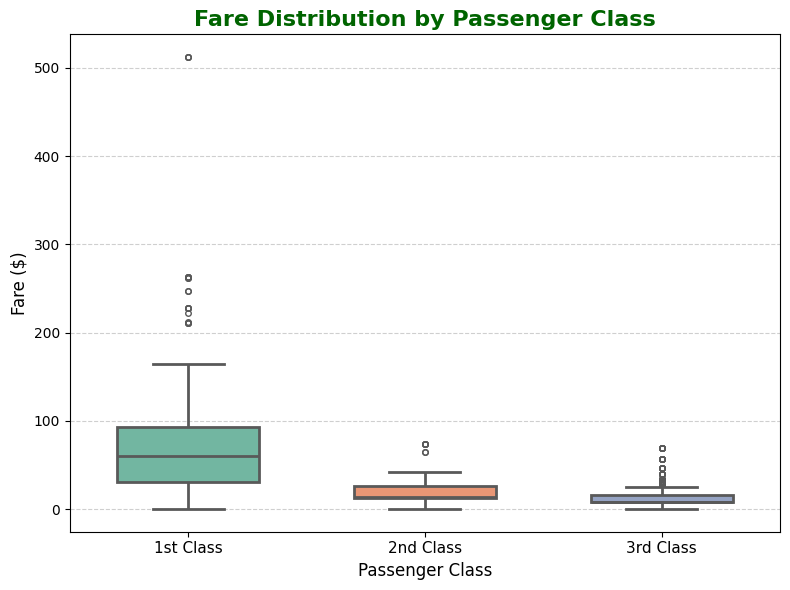

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2', width=0.6, linewidth=2, fliersize=4)

plt.title('Fare Distribution by Passenger Class', fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Fare ($)', fontsize=12)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], fontsize=11)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\DIYA\AppData\Local\Temp\ipykernel_19328\229810280.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='pastel', width=0.6, linewidth=2, fliersize=4)


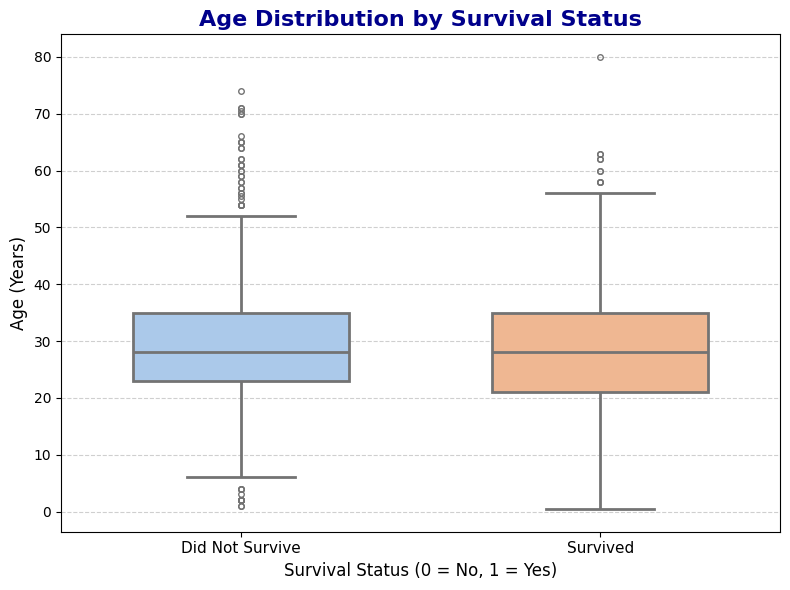

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette='pastel', width=0.6, linewidth=2, fliersize=4)

plt.title('Age Distribution by Survival Status', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Survival Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Age (Years)', fontsize=12)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'], fontsize=11)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

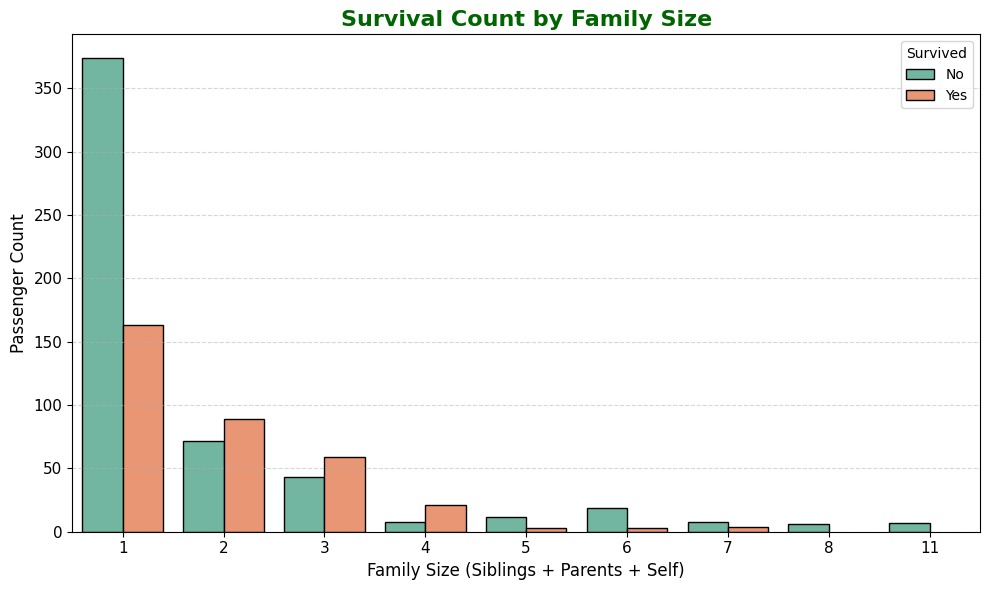

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='Set2', edgecolor='black')

plt.title('Survival Count by Family Size', fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel('Family Size (Siblings + Parents + Self)', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()